The prediction Completed 
 for the number of clusters: 5

0 T-shirt/top
1 Trouser
2 Pullover
2 Pullover
3 Dress
6 Shirt
8 Bag
4 Coat
5 Sandal
0 T-shirt/top
3 Dress
6 Shirt
4 Coat
6 Shirt
8 Bag
5 Sandal
6 Shirt
3 Dress
6 Shirt
4 Coat
4 Coat
4 Coat
2 Pullover
1 Trouser
5 Sandal


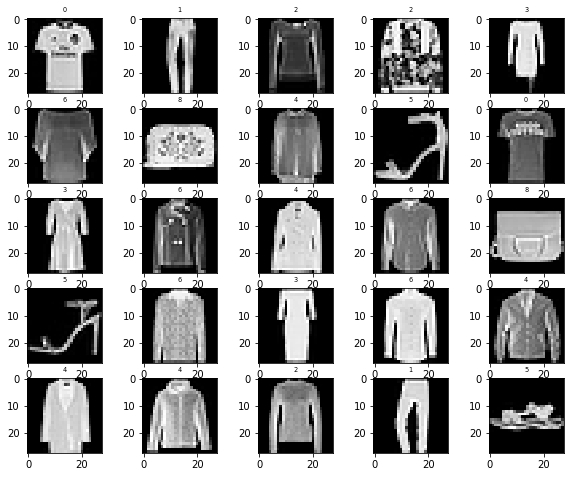

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3
           4       0.80      0.80      0.80         5
           5       1.00      1.00      1.00         3
           6       0.60      0.75      0.67         4
           8       1.00      1.00      1.00         2

    accuracy                           0.88        25
   macro avg       0.93      0.91      0.92        25
weighted avg       0.90      0.88      0.88        25

The average_accuracy is 88.0%


In [1]:
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

label_dict = {0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}


def ReadCsv():
    global train
    train = pd.read_csv('fashion_dataset/train.csv')
    test = pd.read_csv('fashion_dataset/test.csv')
    global X_train,y_train,X_test,y_test
    X_train = np.array(train.iloc[:, 1:])
    y_train = np.array(train.iloc[:, 0]) # target values of training dataset
    X_test =  np.array(test.iloc[:25, 1:])
    y_test = np.array(test.iloc[:25, 0]) # target values of testing dataset
    train.shape

def plot_train():
    n_row = 2
    n_col = 5
    plt.figure(figsize=(10,8))
    for i in list(range(n_row*n_col)):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
        title_text = "Image" + str(i+1)
        plt.title(y_train[i], size=6.5)
    plt.show()

def plot_test():
    n_row = 5
    n_col = 5
    plt.figure(figsize=(10,8))
    for data in final_list[:25]:
        print(data, label_dict[data])
    for i in list(range(n_row*n_col)):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(X_test[i,:].reshape(28,28), cmap="gray")
        plt.title(final_list[i], size=6.5)
    plt.show()
    

def Training(clusters):
    model = KNeighborsClassifier(n_neighbors=clusters)
    model.fit(X_train,y_train)
    global final_pred
    final_pred = model.predict(X_test)
    print("The prediction Completed \n for the number of clusters: "+str(clusters)+"\n")
    #print(final_pred)
    global final_list
    final_list = list(final_pred)


def Accuracy():
    print(metrics.classification_report(y_test, final_pred))
    accuracy = metrics.accuracy_score(y_test, final_pred)
    average_accuracy = np.mean(y_test == final_pred) * 100
    print("The average_accuracy is {0:.1f}%".format(average_accuracy))


ReadCsv()
Training(5)
plot_test()
Accuracy()
